# Check In-Situ Bathymetry Observations

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cmocean import cm

In [2]:
infile = '/data/po/jasket/chrenkl/Bathymetry/In-Situ/insitu_scotian_shelf.dat'

df = pd.read_csv(infile, header=None,
                   delimiter='\s+',
                   names=['year', 'month', 'day', 'hr', 'min', 'sec', 'lon', 'lat', 'ID', 
                          'depth', 'agency', 'type', 'datum', 'group'],
                   engine='python')

# load gridded in-situ observations
# file name of cleaned and corrected insitu data
ginsitufile = os.path.join('/home/chrenkl/jasket/Models/GoMSS/Configuration/gridded_in-situ.npz')
    
gridInSitu = np.load(ginsitufile)

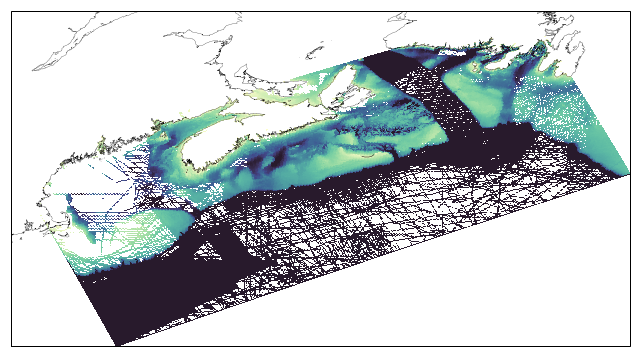

In [11]:
-

In [4]:
df.head()

,year,month,day,hr,min,sec,lon,lat,ID,depth,agency,type,datum,group
0,1977,8,10,0,0,0.079,-66.976931,41.000524,SOUNDG,-65.6,BOULDER,15,MSL:2006,a2095l01
1,1977,8,10,0,0,7.821,-66.988132,41.095220,SOUNDG,-67.5,BOULDER,15,MSL:2006,a2095l01
2,1977,8,10,0,0,0.080,-66.938733,41.007324,SOUNDG,-67.5,BOULDER,15,MSL:2006,a2095l01
3,1977,8,10,0,0,0.081,-66.900234,41.013424,SOUNDG,-69.4,BOULDER,15,MSL:2006,a2095l01
4,1983,11,3,0,0,1.625,-66.887734,41.037223,SOUNDG,-79.9,BOULDER,15,MSL:2006,ba83035


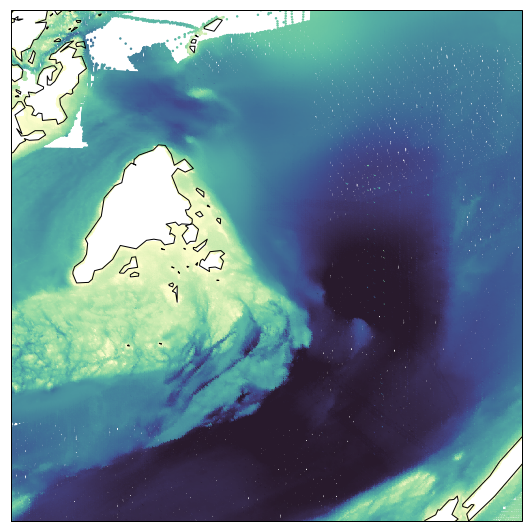

In [5]:
# remove all entries from gridded data sets
df = df[(df.agency != 'GMT'   ) & \
        (df.agency != 'NETCDF') & \
        (df.agency != 'NGDC'  ) & \
        (df.agency != 'IBCAO' ) & \
        (df.group  != 'ABC'   ) & \
        (df.agency != 'CHSQUE') & \
        (df.agency != 'NSTOPO') & \
        (df.group  != 'INTERP')]

# Figure 1:
# -------------------------------------------------------------------------

# create figure        
fig = plt.figure(figsize=(7.5, 9.))
ax = plt.axes(projection=ccrs.PlateCarree())

# colormap
cmap = cm.deep

coastline = cfeature.GSHHSFeature(scale='h')

ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())

ax.scatter(df.lon, df.lat,
           s=2,
           c=-df.depth,
           vmin=0.,
           vmax=dmax,
           cmap=cmap,
           transform=ccrs.PlateCarree())
ax.add_feature(coastline)

fig.tight_layout()

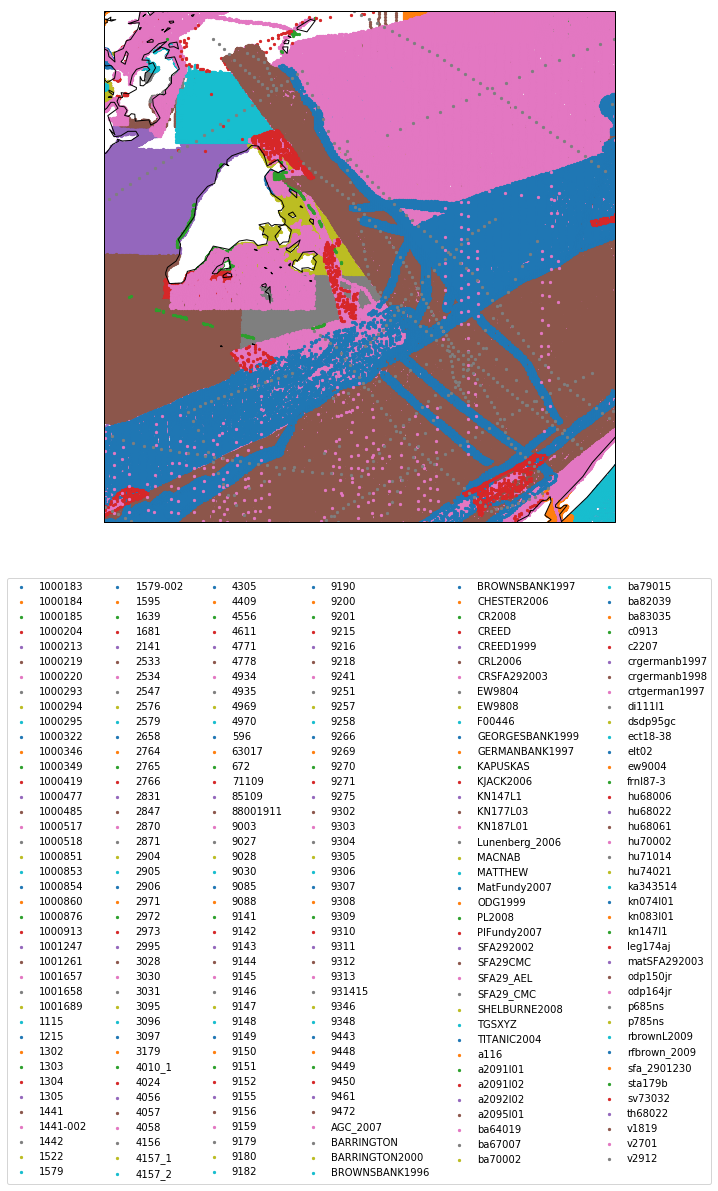

In [6]:
# Figure 2:
# -------------------------------------------------------------------------

# create figure        
fig = plt.figure(figsize=(7.5, 9.))
ax = plt.axes(projection=ccrs.PlateCarree())

# colormap
cmap = cm.balance
cmap.set_bad('red')

coastline = cfeature.GSHHSFeature(scale='h')

ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())

groups = df.groupby('group')

for name, group in groups:
    ax.scatter(group.lon, group.lat, s=5, label=name)

ax.add_feature(coastline)
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=6)

fig.tight_layout()

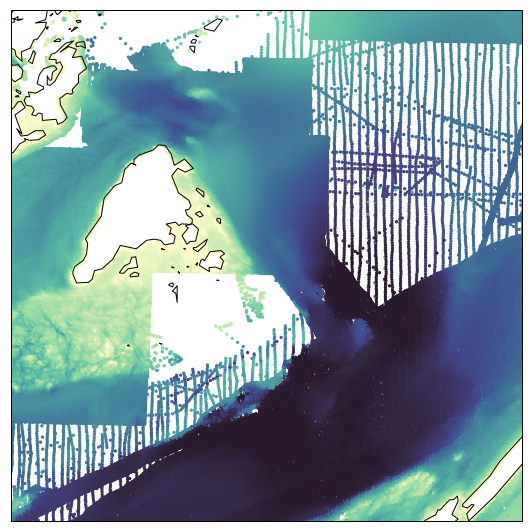

In [7]:
# I have identified the following cruises to have errorneous depth, exclude them from dataset

# - 'ect18-38'
# - 'ch036l01'
# - 'c2207'
# - 'p885ns'
# - 'a2091l01'
# - 'kn151l4'
# - 'KJACK2006'
# - 'BROWNABANK1996'

# remove entries
df = df[(df.group != 'ect18-38') & \
        (df.group != 'ch036l01') & \
        (df.group != 'c2207'   ) & \
        (df.group != 'p885ns'  ) & \
        (df.group != 'a2091l01') & \
        (df.group != 'kn151l4' ) & \
        (df.group != 'KJACK2006') & \
        (df.group != 'BROWNSBANK1996')]

# Figure 1:
# -------------------------------------------------------------------------

# create figure        
fig = plt.figure(figsize=(7.5, 9.))
ax = plt.axes(projection=ccrs.PlateCarree())

# colormap
cmap = cm.balance

# coordinate limits
#lonmin = -70.
#lonmax = -66.
#latmin = 39.75
#latmax = 42.5

coastline = cfeature.GSHHSFeature(scale='h')

ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())

ax.scatter(df.lon, df.lat,
           s=5,
           c=-df.depth,
           vmin=0.,
           vmax=dmax,
           cmap=cm.deep)
ax.add_feature(coastline)

fig.tight_layout()

In [8]:
# remove all entries from gridded data sets
test = df[df.group == '9179']
          
# Figure 1:
# -------------------------------------------------------------------------

# create figure        
fig = plt.figure(figsize=(7.5, 9.))
ax = plt.axes(projection=ccrs.PlateCarree())

# colormap
cmap = cm.balance

# coordinate limits
#lonmin = -67.5
#lonmax = -66.
#latmin = 40.75
#latmax = 42.5

coastline = cfeature.GSHHSFeature(scale='h')

ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())

ax.scatter(test.lon, test.lat,
           s=5,
           c=-test.depth,
           vmin=0.,
           vmax=dmax,
           cmap=cm.deep)
ax.add_feature(coastline)

fig.tight_layout()

IndexError: Out of bounds on buffer access (axis 0)

IndexError: Out of bounds on buffer access (axis 0)